## Import Necessary Libraries:


In [178]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.io
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

## Load Dataset from NOAA Website:

In [179]:
#load ONI Index as CSV File, convert to pandas dataframe: Source: Stack Exchange
url_ONI_INDEX = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt'
response = requests.get(url_ONI_INDEX)
data1 = StringIO(response.text)
df_ONI = pd.read_csv(data1, delim_whitespace=True, comment='*')
df_ONI['Date'] = pd.to_datetime(df_ONI['YR'].astype(str) + df_ONI['MON'].astype(str).str.zfill(2), format='%Y%m')
df_ONI

,YR,MON,TOTAL,ClimAdjust,ANOM,Date
0,1950,1,24.56,26.18,-1.62,1950-01-01
1,1950,2,25.07,26.39,-1.32,1950-02-01
2,1950,3,25.88,26.95,-1.07,1950-03-01
3,1950,4,26.29,27.39,-1.11,1950-04-01
4,1950,5,26.19,27.56,-1.37,1950-05-01
...,...,...,...,...,...,...
897,2024,10,26.45,26.72,-0.27,2024-10-01
898,2024,11,26.46,26.70,-0.25,2024-11-01
899,2024,12,26.00,26.60,-0.60,2024-12-01
900,2025,1,25.81,26.55,-0.74,2025-01-01


## Plot ONI Index Data:

Text(0.5, 1.0, 'ONI 3.4 Index')

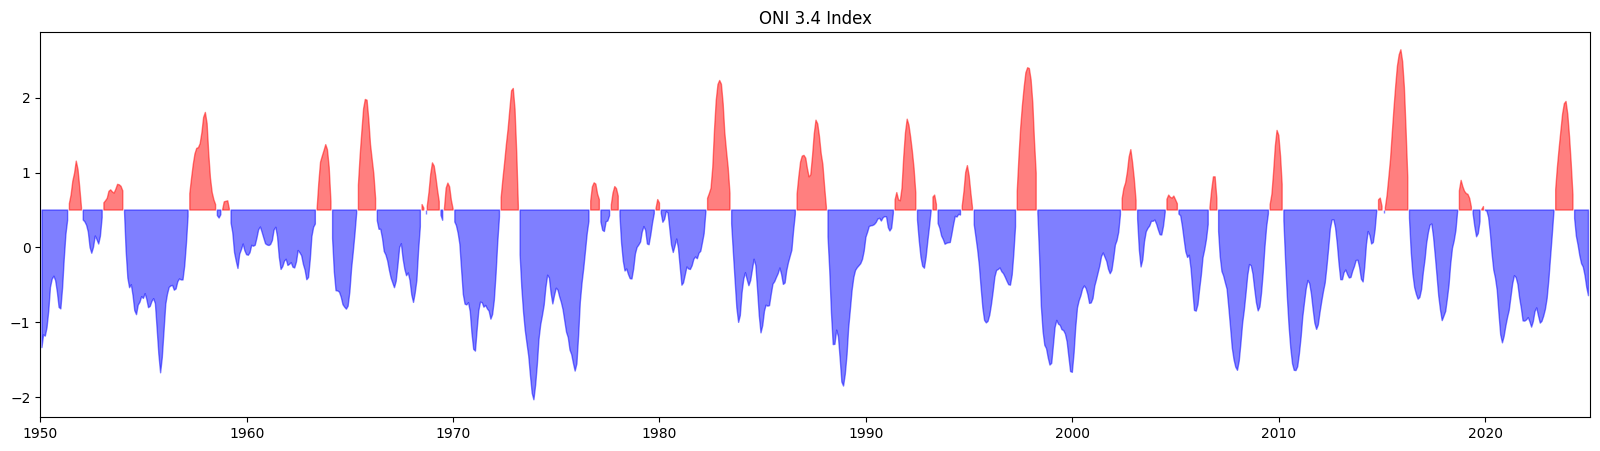

In [180]:
# Calculating Rolling Mean: Smooths over the Function
plt.figure(figsize = (20,5))
ROLLING_MEAN = df_ONI['ANOM'].rolling(window = 3, center = True).mean()
plt.fill_between(df_ONI['Date'], ROLLING_MEAN, 0.5, where=(ROLLING_MEAN > 0.5), color='red', alpha=0.5)
plt.fill_between(df_ONI['Date'], ROLLING_MEAN, 0.5, where=(ROLLING_MEAN < 0.5), color='blue', alpha=0.5)
plt.xlim(df_ONI['Date'].iloc[0], df_ONI['Date'].iloc[-1])
plt.title('ONI 3.4 Index')

## Open Dataset Containing Sea Surface Temperature and ONI:

In [189]:
link2data = "https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices"
response = requests.get(link2data)
data2 = StringIO(response.text)
df_2 = pd.read_csv(data2, delim_whitespace=True, comment='*')
#create a variable in the dataset containing the date
df_2["DATE"] = pd.to_datetime(df_ONI['YR'].astype(str) + df_ONI['MON'].astype(str).str.zfill(2), format='%Y%m')
df_2


,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3,DATE
0,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08,1950-01-01
1,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20,1950-02-01
2,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14,1950-03-01
3,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02,1950-04-01
4,1982,5,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49,1950-05-01
...,...,...,...,...,...,...,...,...,...,...,...
513,2024,10,20.55,-0.32,25.04,-0.05,28.83,0.15,26.49,-0.28,1992-10-01
514,2024,11,21.88,0.26,25.17,-0.03,28.81,0.14,26.68,-0.14,1992-11-01
515,2024,12,22.74,-0.10,24.91,-0.35,28.07,-0.37,26.03,-0.62,1992-12-01
516,2025,1,24.32,-0.20,25.49,-0.18,27.59,-0.63,25.86,-0.71,1993-01-01


Text(0.5, 1.0, 'Sea Surface Temperature and ONI 3.4 Index')

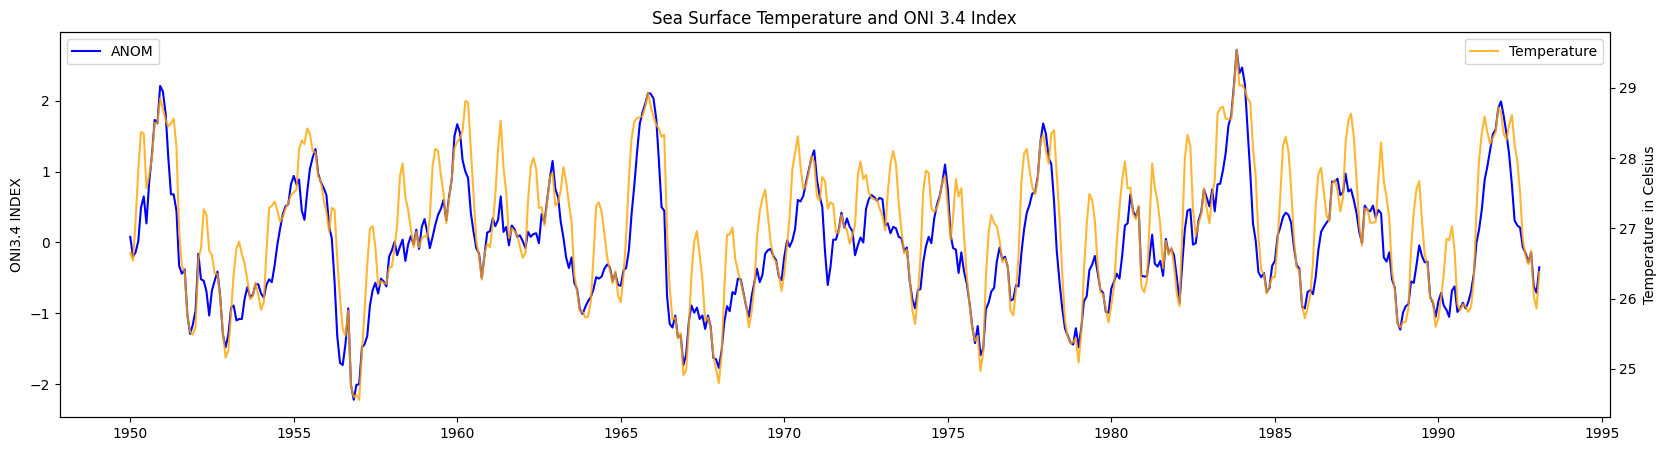

In [211]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(df_2['DATE'],df_2['ANOM.3'], color = 'blue',label= 'ANOM')
ax1.set_ylabel("ONI3.4 INDEX")
ax1.legend(loc= 'upper left')
ax2 = ax1.twinx()
ax2.plot(df_2['DATE'],df_2['NINO3.4'], color = 'orange', alpha = 0.8,label= 'Temperature')
ax2.set_ylabel("Temperature in Celsius")
ax2.legend(loc = 'upper right')
plt.title("Sea Surface Temperature and ONI 3.4 Index")



Text(0.5, 1.0, 'Nino Indices')

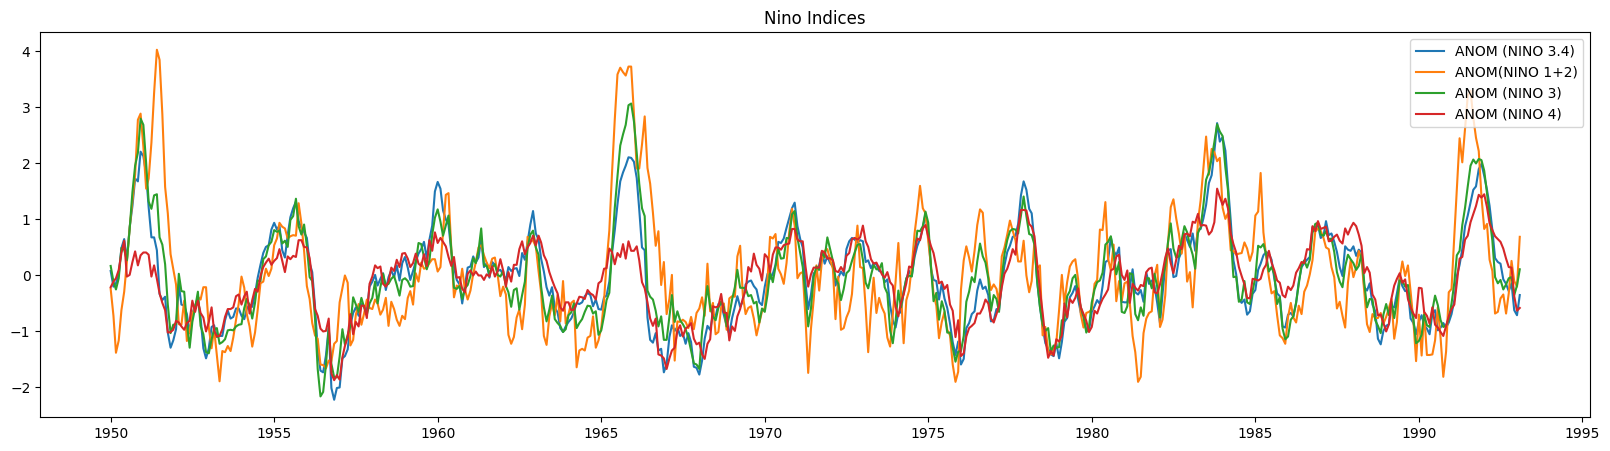

In [212]:
figure = plt.figure(figsize = (20,5))
plt.plot(df_2['DATE'],df_2['ANOM.3'],label= 'ANOM (NINO 3.4)')
plt.plot(df_2['DATE'],df_2['ANOM'],label= 'ANOM(NINO 1+2)')
plt.plot(df_2['DATE'],df_2['ANOM.1'],label= 'ANOM (NINO 3)')
plt.plot(df_2['DATE'],df_2['ANOM.2'],label= 'ANOM (NINO 4)')
plt.legend(loc = 'upper right')
plt.title("Nino Indices")